<a href="https://colab.research.google.com/github/klnsuman/MachineLearning/blob/master/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/My Drive/Anamoly')

In [8]:
!ls -lrt

total 122698
-rw------- 1 root root    274780 Nov 20 04:51 faccount.txt
-rw------- 1 root root 125352890 Nov 20 04:52 ftxn2.txt
-rw------- 1 root root       366 Nov 20 04:53 fagraph.ddl
-rw------- 1 root root     13371 Nov 21 05:55 fruits_hist.png


In [9]:
df_facct = pd.read_csv('faccount.txt')
df_facct

,ACCTID,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
0,800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
1,800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
2,800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
3,800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
4,800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,501232,BUSINESS,"Richard, Morgan",Morgan,Richard,1965-02-22T00:00:00,2016-04-20T00:00:00,LOW,BRISBANE,-27.500806,153.084632,CUSTOMER
1996,501233,CREDIT,"Roberts, Amanda",Amanda,Roberts,1990-06-12T00:00:00,2017-06-03T00:00:00,LOW,BRISBANE,-27.492933,152.984622,CUSTOMER
1997,501234,SAVINGS,"Lopez, Christine",Christine,Lopez,1970-01-15T00:00:00,2017-04-23T00:00:00,MEDIUM,BRISBANE,-27.489311,153.094632,CUSTOMER
1998,501235,CREDIT,"Mullins, Robert",Robert,Mullins,1962-11-08T00:00:00,2018-09-21T00:00:00,MEDIUM,BRISBANE,-27.535691,152.985188,CUSTOMER


In [10]:
df_ftxn = pd.read_csv('ftxn2.txt')
df_ftxn

,TXN_ID,TXTYPE,AMOUNT,FROMACCTID,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
0,950060711303,PAYMENT,320,500607,800242,2020-01-22T17:00:00,Dinner with Shane,N,Y
1,950060711401,PAYMENT,48,500607,800111,2020-01-23T08:00:00,Breakfast with Steven,N,Y
2,950060711402,TRANSFER,6209,500607,500929,2020-01-23T13:00:00,Holiday Cost,N,Y
3,950060711403,PAYMENT,66,500607,800252,2020-01-23T17:00:00,Meal with Mary,N,Y
4,950060711501,PAYMENT,47,500607,800116,2020-01-24T08:00:00,Coffee with Brian,N,Y
...,...,...,...,...,...,...,...,...,...
1533061,950134025802,TRANSFER,9159,501340,500730,2020-06-15T13:00:00,Water Costs,N,Y
1533062,950134025803,PAYMENT,323,501340,800201,2020-06-15T17:00:00,Meal with Christine,N,Y
1533063,950134025901,PAYMENT,75,501340,800136,2020-06-16T08:00:00,Coffee with Kyle,N,Y
1533064,950134025902,TRANSFER,3997,501340,501193,2020-06-16T13:00:00,Water Costs,N,Y


In [11]:
df_ftxn['ISFLAGGED'].unique()

array(['Y'], dtype=object)

In [12]:
df_ftxn["AMOUNT"]

0           320
1            48
2          6209
3            66
4            47
           ... 
1533061    9159
1533062     323
1533063      75
1533064    3997
1533065     211
Name: AMOUNT, Length: 1533066, dtype: int64

In [13]:
df_ftxn



,TXN_ID,TXTYPE,AMOUNT,FROMACCTID,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
0,950060711303,PAYMENT,320,500607,800242,2020-01-22T17:00:00,Dinner with Shane,N,Y
1,950060711401,PAYMENT,48,500607,800111,2020-01-23T08:00:00,Breakfast with Steven,N,Y
2,950060711402,TRANSFER,6209,500607,500929,2020-01-23T13:00:00,Holiday Cost,N,Y
3,950060711403,PAYMENT,66,500607,800252,2020-01-23T17:00:00,Meal with Mary,N,Y
4,950060711501,PAYMENT,47,500607,800116,2020-01-24T08:00:00,Coffee with Brian,N,Y
...,...,...,...,...,...,...,...,...,...
1533061,950134025802,TRANSFER,9159,501340,500730,2020-06-15T13:00:00,Water Costs,N,Y
1533062,950134025803,PAYMENT,323,501340,800201,2020-06-15T17:00:00,Meal with Christine,N,Y
1533063,950134025901,PAYMENT,75,501340,800136,2020-06-16T08:00:00,Coffee with Kyle,N,Y
1533064,950134025902,TRANSFER,3997,501340,501193,2020-06-16T13:00:00,Water Costs,N,Y


In [14]:
df_ftxn["AMOUNT"].sum(),df_ftxn["AMOUNT"].min(),df_ftxn["AMOUNT"].max()

(2859883724, 25, 200020)

In [15]:
df_ftxn["AMOUNT"].describe().round()

count    1533066.0
mean        1865.0
std         3039.0
min           25.0
25%           66.0
50%          280.0
75%         2873.0
max       200020.0
Name: AMOUNT, dtype: float64

In [16]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.3.0


In [17]:
df_ftxn["AMOUNT"].describe()

count    1.533066e+06
mean     1.865467e+03
std      3.039119e+03
min      2.500000e+01
25%      6.600000e+01
50%      2.800000e+02
75%      2.873000e+03
max      2.000200e+05
Name: AMOUNT, dtype: float64

In [18]:
df_ftxn.describe().round()

,TXN_ID,AMOUNT,FROMACCTID,TOACCTID
count,1.533066e+06,1533066.0,1533066.0,1533066.0
mean,9.504230e+11,1865.0,500710.0,700368.0
std,5.380156e+10,3039.0,1792.0,141185.0
min,9.500000e+11,25.0,500000.0,500000.0
25%,9.500350e+11,66.0,500350.0,501049.0
50%,9.500700e+11,280.0,500700.0,800149.0
75%,9.501050e+11,2873.0,501050.0,800224.0
max,9.150080e+12,200020.0,800435.0,800435.0


In [29]:
def preprocess(amounts):
  if amounts<=67:
    class_lab = "1"
  elif 67 < amounts <= 1000  :
    class_lab = "2"
  elif 1000 < amounts <= 2000  :
    class_lab = "3"
  elif 2000 <= amounts <= 3000  :
    class_lab = "4"
  elif 3000 < amounts <= 4000  :
    class_lab = "5"
  elif 4000 < amounts <= 5000  :
    class_lab = "6"
  elif 5000 < amounts <= 6000  :
    class_lab = "7"
  elif 6000 < amounts <= 7000  :
    class_lab = "8"
  elif 7000 < amounts <= 8000  :
    class_lab = "9"      
  elif 8000 < amounts <= 9000  :
    class_lab = "10"      
  elif 9000 < amounts <= 10000  :
    class_lab = "11"      
  elif 10000 < amounts <= 11000  :
    class_lab = "12"      
  elif 11000 < amounts <= 12000  :
    class_lab = "13"      
  elif 12000 < amounts <= 13000  :
    class_lab = "14"  

  elif 13000 < amounts <= 100000  :
    class_lab = "15"   
  elif 100000 < amounts <= 200000  :
    class_lab = "16"       
  else :
    class_lab = "17"  
  
  return class_lab

    

In [30]:
df_ftxn['class_lab'] = None

In [32]:
df_ftxn['class_lab'] = df_ftxn.AMOUNT.apply(lambda x:preprocess(x))

In [33]:
df_ftxn['class_lab'].nunique

<bound method IndexOpsMixin.nunique of 0           2
1           1
2           8
3           1
4           1
           ..
1533061    11
1533062     2
1533063     2
1533064     5
1533065     2
Name: class_lab, Length: 1533066, dtype: object>

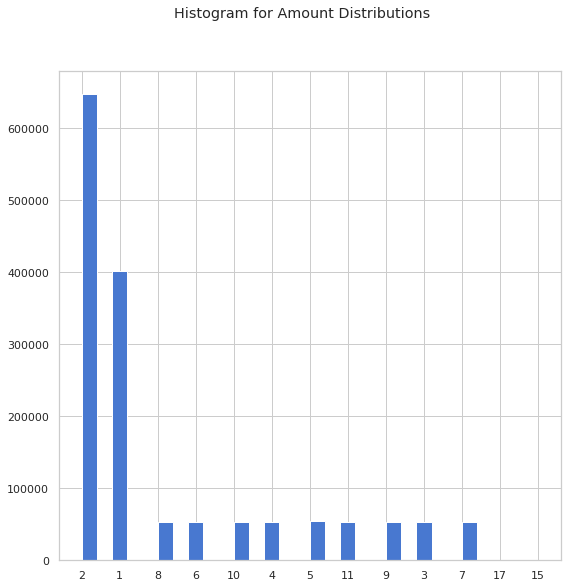

In [36]:
import pylab as pl
df_ftxn['class_lab'].hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for Amount Distributions")
plt.savefig('Amt')
plt.show()


In [24]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.3.0


In [28]:
df_ftxn['class_lab'].value_counts()

2     647196
1     401899
5      54089
7      53892
9      53836
3      53826
6      53772
4      53751
10     53656
11     53651
8      53432
15        66
Name: class_lab, dtype: int64